In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['target']=iris.target
iris_df['species']=iris.target_names[iris.target]
#from io import StringIO
#df = pd.read_csv(StringIO(data), delimiter='\t')

In [3]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

In [4]:
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris_df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [10]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [13]:
# Encode the target variable
le = LabelEncoder()
iris_df['species_encoded'] = le.fit_transform(iris_df['species'])

In [14]:
# Selecting only two features for visualization
X_train_vis = X_train[['sepal length (cm)', 'sepal width (cm)']]

Text(0, 0.5, 'sepal width (cm)')

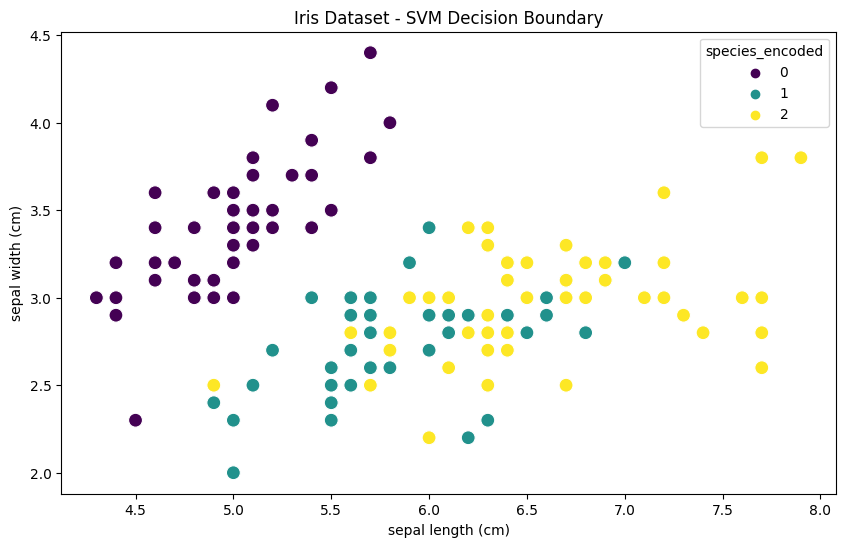

In [15]:
# Visualize the decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species_encoded', data=iris_df, palette='viridis', s=100)
plt.title('Iris Dataset - SVM Decision Boundary')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


In [16]:
import seaborn as sns
# Selecting the features for pair plot
features_for_pair_plot = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [17]:
# Adding the species column back for visualization
X_train_pair_plot = X_train[features_for_pair_plot].copy()
X_train_pair_plot['species'] = y_train


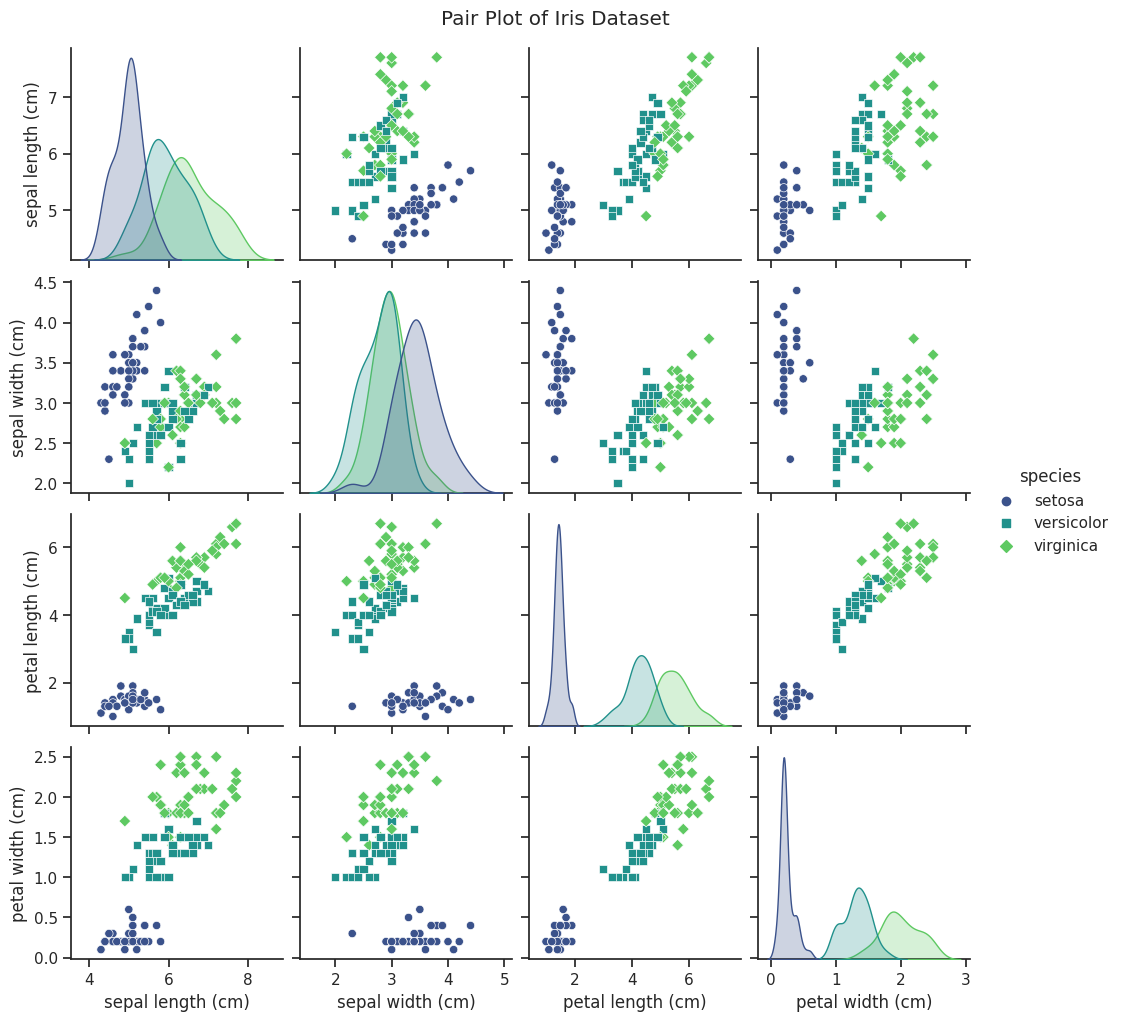

In [18]:
# Create a pair plot
sns.set(style="ticks")
sns.pairplot(X_train_pair_plot, hue="species", palette="viridis", markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

In [21]:
# Train the model
model.fit(X_train, y_train)

GaussianNB()

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

Accuracy: 1.00



In [24]:
classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
model = SVC()

In [26]:
model.fit(X_train, y_train)

SVC()

In [27]:
predictions = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

In [29]:
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

